<a href="https://colab.research.google.com/github/yaffawijaya/Fuzzy-Logic-Mamdani---Python3-/blob/main/Fuzzy_Logic_Mamdani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TuPro 2 AI - Kelompok 4
##Anggota Kelompok:
- Yaffazka Afazillah Wijaya (1305210076)
- Luhung Fallah Firdaus (1305210033)
- Mugni Hidayah (1305210090)

##Tugas:
- Membaca dataset
- Membuat Fungsi: Fuzzifikasi, Inferensi dan Defuzzifikasi
- Mencari nilai kelayakan setiap kualitas dengan harga berdasarkan dataset "suppier.xlsx"
- Ranking 5 terbesar berdasarkan kolom nilai kelayakan
- Mengunduh dataset hasil logika fuzzy mamdani

In [28]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt


#Membaca Data dari Excel

In [29]:
#Untuk mengakses hasil, upload file "supplier.xlsx" pada colab file
try:
  df = pd.read_excel('supplier.xlsx', index_col=0, usecols=("id","kualitas","harga"))
  df
except:
  print(
      """
      Dataset error, pastikan:
      - Dataset benar
      - Nama file "supplier.xlsx"
      """
  )

#Visualisasi Bentuk & Fungsi Keanggotaan

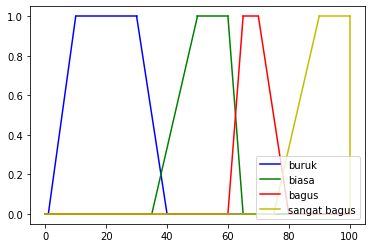

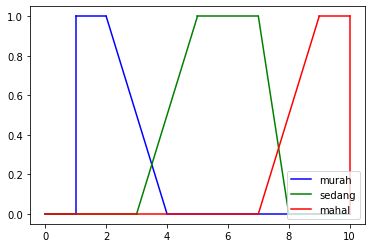

In [30]:
def plotLinguistik(point, warna, label='', min=0, max=1):
    # set nilai y 
    y = [0, 1, 1, 0]

    # plot garis pertama
    plt.plot([min, point[0]], [0, 0], warna)
    
    # plot garis antara garis pertama dan terakhir
    for i in range(len(point) - 1):
        plt.plot([point[i], point[i + 1]], [y[i], y[i + 1]], warna)
    
    # plot garis terakhir
    plt.plot([point[3], max], [0, 0], warna, label=label)

def linguistikGraph(membership, min=0, max=1):
    colors = ['b', 'g', 'r', 'y']

    # Plot masing-masing linguistik
    i = 0
    for ling in membership:
        plotLinguistik(membership[ling], colors[i], ling, min=min, max=max)
        i += 1
    
    plt.legend(loc=4)
    plt.show()

# Linguistik value kualitas
kualitas = {
    'buruk'   : [ 1, 10, 30, 40],
    'biasa' : [ 35, 50, 60, 65],
    'bagus'   : [60, 65, 70, 80],
    'sangat bagus'  : [75, 90, 100, 100]
}

# Linguistik value harga
harga = {
    'murah'   : [1, 1, 2, 4],
    'sedang' : [3, 5, 7, 8],
    'mahal'   : [7, 9, 10, 10]
}


linguistikGraph(kualitas, max=100)
linguistikGraph(harga, max=10)

#Variabel & Nilai Linguistik

In [31]:
## Linguistic Variables
set_nama_kualitas = ['buruk','biasa','bagus','sb']
set_nama_harga = ['murah','sedang','mahal']

## Linguistic Value
# kualitas

buruk = [1, 10, 30, 40]
biasa = [35, 50, 60, 65]
bagus = [60, 65, 70, 80]
sb = [75, 90, 100, 100]

# harga
murah = [1, 1, 2, 4]
sedang =  [3, 5, 7, 8]
mahal = [7, 9, 10, 10]

#Rumus Fungsi Bentuk : "Trapezoid"

In [32]:
## Trapezoidal Function
def trapezoid(x,a,b,c,d):
  if (x<=a) or (x>=d):
    return 0
  elif (a<x<b):
    return (x-a)/(b-a)
  elif (b<=x<=c):
    return 1
  elif (c<x<=d):
    return (d-x)/(d-c)

list_kualitas = df['kualitas'].tolist()
list_harga = df['harga'].tolist()


#Fuzzifikasi: "Kualitas & Harga"

In [33]:
def hasil_fungsi_kualitas(x):
  global buruk
  global biasa
  global bagus
  global sb

  #buruk x biasa
  if x in range(buruk[0],buruk[3]+1) and x in range(biasa[0],biasa[3]+1):
    nilai_trapz_buruk = (trapezoid(x,buruk[0],buruk[1],buruk[2],buruk[3]))
    nilai_trapz_biasa = (trapezoid(x,biasa[0],biasa[1],biasa[2],biasa[3]))
    nama0,nama1 = set_nama_kualitas[0],set_nama_kualitas[1]
    set_buruk = [nilai_trapz_buruk,nama0]
    set_biasa = [nilai_trapz_biasa,nama1]
    final = [set_buruk,set_biasa]
    return final
    
  #buruk x buruk
  elif x in range(buruk[0],buruk[3]+1):
    nilai_trapz = (trapezoid(x,buruk[0],buruk[1],buruk[2],buruk[3]))
    nama = set_nama_kualitas[0]
    set_buruk1 = [nilai_trapz,nama]
    set_buruk2 = [nilai_trapz+0.02,nama]
    final = [set_buruk1,set_buruk2]
    return final

  #biasa x bagus
  if x in range(biasa[0],biasa[3]+1) and x in range(bagus[0],bagus[3]+1):
    nilai_trapz_biasa = (trapezoid(x,biasa[0],biasa[1],biasa[2],biasa[3]))
    nilai_trapz_bagus = (trapezoid(x,bagus[0],bagus[1],bagus[2],bagus[3]))
    nama1,nama2 = set_nama_kualitas[1],set_nama_kualitas[2]
    set_biasa = [nilai_trapz_biasa,nama1]
    set_bagus = [nilai_trapz_bagus,nama2]
    final = [set_biasa,set_bagus]
    return final

  #biasa x biasa
  elif x in range(biasa[0],biasa[3]+1):
    nilai_trapz = (trapezoid(x,biasa[0],biasa[1],biasa[2],biasa[3]))
    nama = set_nama_kualitas[1]
    set_biasa1 = [nilai_trapz,nama]
    set_biasa2 = [nilai_trapz+0.02,nama]
    final = [set_biasa1,set_biasa2]
    return final

  #bagus x sb
  if x in range(bagus[0],bagus[3]+1) and x in range(sb[0],sb[3]+1):
    nilai_trapz_bagus = (trapezoid(x,bagus[0],bagus[1],bagus[2],bagus[3]))
    nilai_trapz_sb = (trapezoid(x,sb[0],sb[1],sb[2],sb[3]))
    nama2,nama3 = set_nama_kualitas[2],set_nama_kualitas[3]
    set_bagus = [nilai_trapz_bagus,nama2]
    set_sb = [nilai_trapz_sb,nama3]
    final = [set_bagus,set_sb]
    return final

  #bagus x bagus
  elif x in range(bagus[0],bagus[3]+1):
    nilai_trapz = (trapezoid(x,bagus[0],bagus[1],bagus[2],bagus[3]))
    nama = set_nama_kualitas[2]
    set_bagus1 = [nilai_trapz,nama]
    set_bagus2 = [nilai_trapz+0.02,nama]
    final = [set_bagus1,set_bagus2]
    return final

  #sb x sb
  elif x in range(sb[0],sb[3]+1):
    nilai_trapz = (trapezoid(x,sb[0],sb[1],sb[2],sb[3]))
    nama = set_nama_kualitas[2]
    set_sb1 = [nilai_trapz,nama]
    set_sb2 = [nilai_trapz+0.02,nama]
    final = [set_sb1,set_sb2]
    return final

#harga 
def hasil_fungsi_harga(x):
  global murah
  global sedang
  global mahal

  #murah x sedang
  if x in range(murah[0],murah[3]+1) and x in range(sedang[0],sedang[3]+1):
    nilai_trapz_murah = (trapezoid(x,murah[0],murah[1],murah[2],murah[3]))
    nilai_trapz_sedang = (trapezoid(x,sedang[0],sedang[1],sedang[2],sedang[3]))
    nama0,nama1 = set_nama_harga[0],set_nama_harga[1]
    set_murah = [nilai_trapz_murah,nama0]
    set_sedang = [nilai_trapz_sedang,nama1]
    final = [set_murah,set_sedang]
    return final
    
  #murah x murah
  elif x in range(murah[0],murah[3]+1):
    nilai_trapz = (trapezoid(x,murah[0],murah[1],murah[2],murah[3]))
    nama = set_nama_harga[0]
    set_murah = [nilai_trapz,nama]
    final = [set_murah,set_murah]
    return final

  #sedang x mahal
  if x in range(sedang[0],sedang[3]+1) and x in range(mahal[0],mahal[3]+1):
    nilai_trapz_sedang = (trapezoid(x,sedang[0],sedang[1],sedang[2],sedang[3]))
    nilai_trapz_mahal = (trapezoid(x,mahal[0],mahal[1],mahal[2],mahal[3]))
    nama1,nama2 = set_nama_harga[1],set_nama_harga[2]
    set_sedang = [nilai_trapz_sedang,nama1]
    set_mahal = [nilai_trapz_mahal,nama2]
    final = [set_sedang,set_mahal]
    return final

  #sedang x sedang
  elif x in range(sedang[0],sedang[3]+1):
    nilai_trapz = (trapezoid(x,sedang[0],sedang[1],sedang[2],sedang[3]))
    nama = set_nama_harga[1]
    set_sedang = [nilai_trapz,nama]
    final = [set_sedang,set_sedang]
    return final

  #mahal x mahal
  elif x in range(mahal[0],mahal[3]+1) and x in range(mahal[0],mahal[3]+1):
    nilai_trapz = (trapezoid(x,mahal[0],mahal[1],mahal[2],mahal[3]))
    nama = set_nama_harga[2]
    set_mahal = [nilai_trapz,nama]
    final = [set_mahal,set_mahal]
    return final


list_fz1 = [hasil_fungsi_kualitas(list_kualitas[i]) for i in range(len(list_kualitas))]
list_fz2 = [hasil_fungsi_harga(list_harga[i]) for i in range(len(list_harga))]

#Fuzzy Rules

In [34]:
## Fuzzy Rules Function
def fuzzy_rules(nilai2,nilai1):
  #Murah
  if nilai1[1] == "murah" and nilai2[1] == "buruk":
    return ("rendah",min(nilai1[0] , nilai2[0]))
  elif nilai1[1] == "murah" and nilai2[1] == "biasa":
    return ("rendah",min(nilai1[0] , nilai2[0]))
  elif nilai1[1] == "murah" and nilai2[1] == "bagus":
    return ("tinggi",min(nilai1[0] , nilai2[0]))
  elif nilai1[1] == "murah" and nilai2[1] == "sb":
    return ("tinggi",min(nilai1[0] , nilai2[0]))
  
  #Sedang
  elif nilai1[1] == "sedang" and nilai2[1] == "buruk":
    return ("rendah",min(nilai1[0] , nilai2[0]))
  elif nilai1[1] == "sedang" and nilai2[1] == "biasa":
    return ("rendah",min(nilai1[0] , nilai2[0]))
  elif nilai1[1] == "sedang" and nilai2[1] == "bagus":
    return ("rendah",min(nilai1[0] , nilai2[0]))
  elif nilai1[1] == "sedang" and nilai2[1] == "sb":
    return ("tinggi",min(nilai1[0] , nilai2[0]))

  #Mahal
  elif nilai1[1] == "mahal" and nilai2[1] == "buruk":
    return ("rendah",min(nilai1[0] , nilai2[0]))
  elif nilai1[1] == "mahal" and nilai2[1] == "biasa":
    return ("rendah",min(nilai1[0] , nilai2[0]))
  elif nilai1[1] == "mahal" and nilai2[1] == "bagus":
    return ("rendah",min(nilai1[0] , nilai2[0]))
  elif nilai1[1] == "mahal" and nilai2[1] == "sb":
    return ("rendah",min(nilai1[0] , nilai2[0]))

#Inferensi

In [35]:
def inferensi(fz1,fz2):
  inf1 = fuzzy_rules(fz1[0],fz2[0])
  inf2 = fuzzy_rules(fz1[0],fz2[1])
  inf3 = fuzzy_rules(fz1[1],fz2[0])
  inf4 = fuzzy_rules(fz1[1],fz2[1])
  final = [inf1,inf2,inf3,inf4]
  return final

def inf_filter_nama(fz1,fz2):
  inf_list_name = [inferensi(fz1,fz2)[0][0],inferensi(fz1,fz2)[1][0],inferensi(fz1,fz2)[2][0],inferensi(fz1,fz2)[3][0]]
  return inf_list_name

def inf_filter_nilai(fz1,fz2):
  inf_list_value = [inferensi(fz1,fz2)[0][1],inferensi(fz1,fz2)[1][1],inferensi(fz1,fz2)[2][1],inferensi(fz1,fz2)[3][1]]
  return inf_list_value

#Defuzzifikasi

In [36]:
def defuz(fz1,fz2): 
  if 'rendah' in inf_filter_nama(fz1,fz2) and 'tinggi' in inf_filter_nama(fz1,fz2):
    final_r = []
    final_t = []
    for data in (inferensi(fz1,fz2)):
      idx = 0
      if 'rendah' in data[idx]:
        final_r.append(data[1])
      elif 'tinggi' in data:
        final_t.append(data[1])
    final_rendah = max(final_r)
    final_tinggi = max(final_t)

    if final_rendah != 0:
      final_set_rendah = final_rendah
    else:
      final_set_rendah = 0.0001

    if final_tinggi != 0:
      final_set_tinggi = final_tinggi
    else:
      final_set_tinggi = 0.0001

    return (((10+20+30+40+50+5)*(final_set_rendah) + 60*0.66+65*0.5+70*0.33) + ((60+70+80+90+100)*(final_set_tinggi) + 80*0.66+65*0.5+70*0.33)) / ((6*final_set_rendah+0.66+0.5+0.33) + (5*final_set_tinggi+0.66+0.5+0.33))

  elif 'rendah' in inf_filter_nama(fz1,fz2):
    final = max(inf_filter_nilai(fz1,fz2))
    if final != 0:
      final_set = final
    else:
      final_set = 0.0001

    return ((10+20+30+40+50)*(final_set)+60*0.66+65*0.5+70*0.33)/(final_set*5+0.66+0.5+0.33)
    
  elif 'tinggi' in inf_filter_nama(fz1,fz2):
    final = max(inf_filter_nilai(fz1,fz2))
    if final != 0:
      final_set = final
    else:
      final_set = 0.0001
    
    return (60*0.33 + 65*0.5 +(70+80+90+100)*(final_set))/(0.33+0.5+ (final_set)*4)

#Main Program : "Fuzzy Logic Mamdani"

In [37]:
#Main Program
#Gunakan Run All untuk mendapatkan hasil 5 terbesar yang tepat

hasil_fuzzy_mamdani = [defuz(list_fz1[i],list_fz2[i]) for i in range(100)]
df['nilai_kelayakan'] = hasil_fuzzy_mamdani
df = df.sort_values('nilai_kelayakan',ascending=False)
df.head(5)

,kualitas,harga,nilai_kelayakan
id,,,
3,98,2,81.221532
17,70,3,73.644400
92,83,3,73.644400
52,94,3,73.644400
91,98,3,73.644400


#Download File Excel:

In [38]:
## Output kedalam file excel
file_name = 'supplier_5_besar.xlsx'
  
# saving the excel
df.head(5).to_excel(file_name)
print('DataFrame tertulis dengan format Excel berhasil ter-export')

DataFrame tertulis dengan format Excel berhasil ter-export
